# Advanced Statistics for Physics Analysis 2020 - 2021
## Lab 4 - Saverio Monaco

In [1]:
options(repr.plot.width=15, repr.plot.height=5)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Exercise 1 - Six Boxes Toy Model: inference
<img src="https://i.ibb.co/CMTxMh7/boxes.png" width="800"/>

#### write a program in R that:

#### 1.1 and 1.3 Allows the user to insert the color of a randomly extracted box and prints on the standard output the probability of selecting each box

Update formula:
$$P(H_j|I_k)=\frac{P(E^k|H_j)P(H_j|I_{k-1})}{\sum_l P(E^k|H_l)P(H_l|I_{k-1})}$$

In [2]:
# I want to write a program that prints the result of dealing with a given box by inputting a sequence of
# extractions (selected by me) in the form of a vector:
# (for example: c(1,0,0,1,0,0,0,0)) where 1 is the event of a black ball extracted, 0 is for the white

pboxbyseq <- function(extractions)
    {
        numextractions <- length(extractions)
    
        # We initialize the first row as the row before any extraction, we have no information on the content
        # of the box beside the fact that the sum of the total white balls in all boxes is equal the sum of the
        # total black balls in all boxes -> f(Ew) = 0.5
        scorew <- 0
        scoreb <- 0
        
        # Since we received no information the box can be either of the 6 with the same probability
        prob0 <- 1/6
        prob1 <- 1/6
        prob2 <- 1/6
        prob3 <- 1/6
        prob4 <- 1/6
        prob5 <- 1/6
        
        # trial  = # extraction
        # whites = # of white balls drawn
        # blacks = # of black balls drawn
        # Hj     = probability of dealing with box j
        # ptot   = sum of the probabilities (just to check if the sum remains 1 as it should be)
        outp <- tibble(trial=0,whites=scorew,blacks=scoreb,
                       H0=prob0, H1=prob1, H2=prob2, H3=prob3, H4=prob4, H5=prob5, ptot=1)
        
        for (k in 1:numextractions)
            {
                kthextr <- extractions[k]
                
                # The update rule changes if we draw either a white or a black ball of course since the
                # information given is different
                if(kthextr == 0)
                    {
                        scorew <- scorew + 1

                        # Now we have to update all the probabilities with the formula in the cell above
                        # note that the denominator is the same:
                        den <- 0
                        for (l in 1:5)
                            {
                                den <- den + (l/5) * as.numeric(outp[k,4+l])
                            }
                        
                        # Update rule
                        prob0 <- 0
                        prob1 <- ((1/5) * prob1)/den
                        prob2 <- ((2/5) * prob2)/den
                        prob3 <- ((3/5) * prob3)/den
                        prob4 <- ((4/5) * prob4)/den
                        prob5 <- (        prob5)/den
                        
                    }
            
                else
                    {
                        scoreb <- scoreb + 1

                        # Now we have to update all the probabilities with the formula in the cell above
                        # note that the denominator is the same:
                        den <- 0
                        for (l in 0:4)
                            {
                                den <- den + ((5-l)/5) * as.numeric(outp[k,4+l])
                            }
                        
                        # Update rule
                        prob0 <- (        prob0)/den
                        prob1 <- ((4/5) * prob1)/den
                        prob2 <- ((3/5) * prob2)/den
                        prob3 <- ((2/5) * prob3)/den
                        prob4 <- ((1/5) * prob4)/den
                        prob5 <- 0
                        
                    }
            
                outp <- add_row(outp,trial = k, whites = scorew, blacks = scoreb,
                                H0=prob0, H1=prob1, H2=prob2, H3=prob3, H4=prob4, H5=prob5,
                                ptot = prob0+prob1+prob2+prob3+prob4+prob5)
            }
        outp
    }

extr <- c(0,1,1,1,0) # I used the same extraction sequence as the one shown in 'Teaching statistics in the physics 
                     # curriculum: Unifying and clarifying role of subjective probability'
                     # just for checking if the code is correct

probs <- pboxbyseq(extr)
round(probs, digits = 3)

trial,whites,blacks,H0,H1,H2,H3,H4,H5,ptot
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0.167,0.167,0.167,0.167,0.167,0.167,1
1,1,0,0.000,0.067,0.133,0.200,0.267,0.333,1
2,1,1,0.000,0.200,0.300,0.300,0.200,0.000,1
3,1,2,0.000,0.320,0.360,0.240,0.080,0.000,1
4,1,3,0.000,0.438,0.370,0.164,0.027,0.000,1
5,2,3,0.000,0.246,0.415,0.277,0.062,0.000,1


#### 1.4 plots the probability for each box as a function of the extraction step

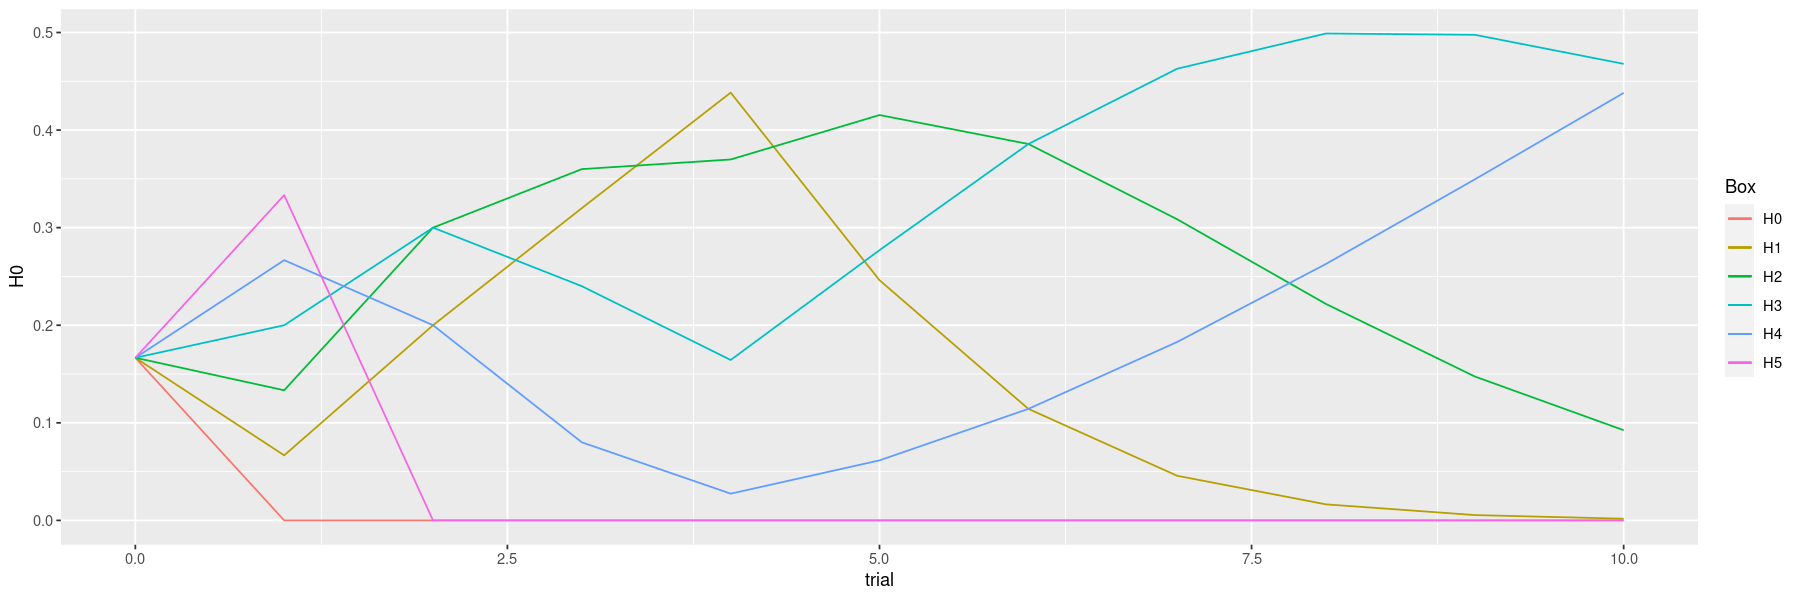

In [3]:
# for plotting purposes I'll create a sequences with more draws
extr <- c(0,1,1,1,0,0,0,0,0,0)
probs <- pboxbyseq(extr)

plotprobs <- function(probs)
    {
        boxes <- c('H0','H1','H2','H3','H4','H5')
        ggplot(probs, aes(trial,H0)) + 
        geom_line(aes(trial,H0,colour=boxes[1])) + 
        geom_line(aes(trial,H1,colour=boxes[2])) + 
        geom_line(aes(trial,H2,colour=boxes[3])) + 
        geom_line(aes(trial,H3,colour=boxes[4])) + 
        geom_line(aes(trial,H4,colour=boxes[5])) + 
        geom_line(aes(trial,H5,colour=boxes[6])) +
        labs(colour='Box')
    }

plotprobs(probs)

### Exercise 2 - Six Boxes Toy Model: simulation
#### Consider again the six boxes toy model of the previous exercise and write a simulation program that:

#### 2.1 Selects a random box

In [4]:
# I'll create a vector for each box:
H0 <- c(1,1,1,1,1)
H1 <- c(0,1,1,1,1)
H2 <- c(0,0,1,1,1)
H3 <- c(0,0,0,1,1)
H4 <- c(0,0,0,0,1)
H5 <- c(0,0,0,0,0)

boxes <- data.frame(H0, H1, H2, H3, H4, H5)

# It selects a random number and return the random box as a vector
randombox <- function()
    {
        rand <- sample(1:6, 1)
        box  <- boxes[,rand]
        box
    }

randombox()

[1] 0 0 0 0 1

#### 2.2 Makes random sampling from the box

In [5]:
# It picks a random element from the vector box initialized in 'randombox'
pickfrombox <- function(box)
    {
        box[sample(1:5, 1)]
    }

box <- randombox()
box

pickfrombox(box)

[1] 1 1 1 1 1

[1] 1

#### 2.3 Prints on the standard output the probability of selecting each box

In [6]:
# We select a random box:
box <- randombox()

# Now we create a sequence picking from this box N times:
N <- 15

sequence <- c()
for (i in 1:N)
    {
        sequence <- c(sequence, pickfrombox(box))
    }

# Now that we have the sequence we can use the function created in point 1:
probs <- pboxbyseq(sequence)
round(probs, digits = 3)

trial,whites,blacks,H0,H1,H2,H3,H4,H5,ptot
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0.167,0.167,0.167,0.167,0.167,0.167,1
1,0,1,0.333,0.267,0.200,0.133,0.067,0.000,1
2,0,2,0.455,0.291,0.164,0.073,0.018,0.000,1
3,1,2,0.000,0.320,0.360,0.240,0.080,0.000,1
4,2,2,0.000,0.154,0.346,0.346,0.154,0.000,1
5,3,2,0.000,0.062,0.277,0.415,0.246,0.000,1
6,4,2,0.000,0.022,0.195,0.438,0.346,0.000,1
7,5,2,0.000,0.007,0.125,0.423,0.445,0.000,1
8,5,3,0.000,0.016,0.222,0.499,0.263,0.000,1


#### 2.4 Plots the probability for each box as a function of the number of trials

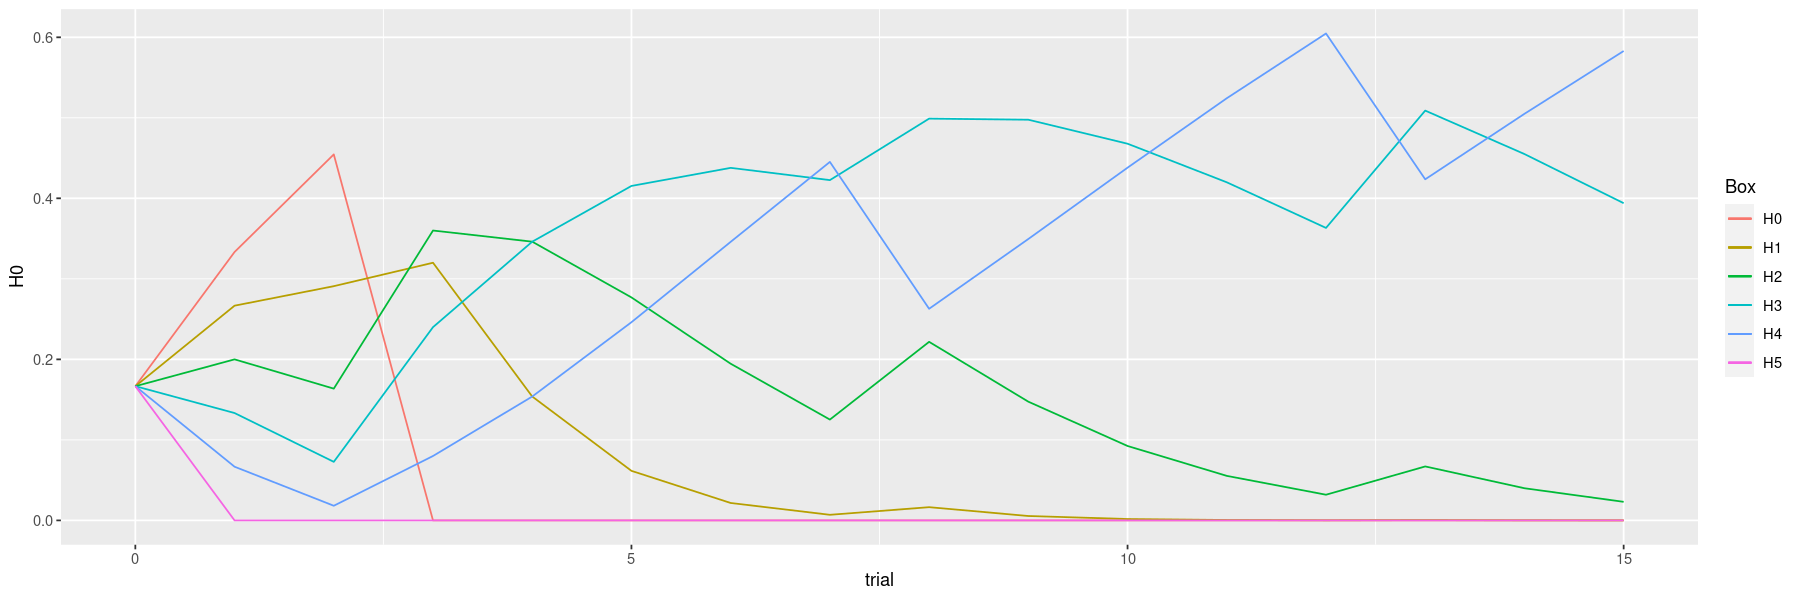

In [7]:
plotprobs(probs)

### Exercise 3
#### An important property of the gamma distribution is the so-called *reproductive property*:
#### given a sequence of independent random variable $X_j ∼ Gamma(\alpha_j , \beta),$ it follows that:
$$ Y = \sum_{j=1}^{n} X_j \to Y ∼ Gamma(\alpha_j , \beta) \quad \text{where}\quad \alpha=\sum_{j=1}^{n}\alpha_j $$

#### If $\alpha = m$ is an integer, a random variable from gamma distribution $Gamma(m,\beta)$  (also known as Erlang distribution) can be obtained by summing m independent exponential random variables $X_j ∼ Exp(\beta)$:
$$ Y = \beta\sum_{j=1}^{n}(-\ln U_j) = -\beta\ln\prod_{j=1}^{n}U_j $$

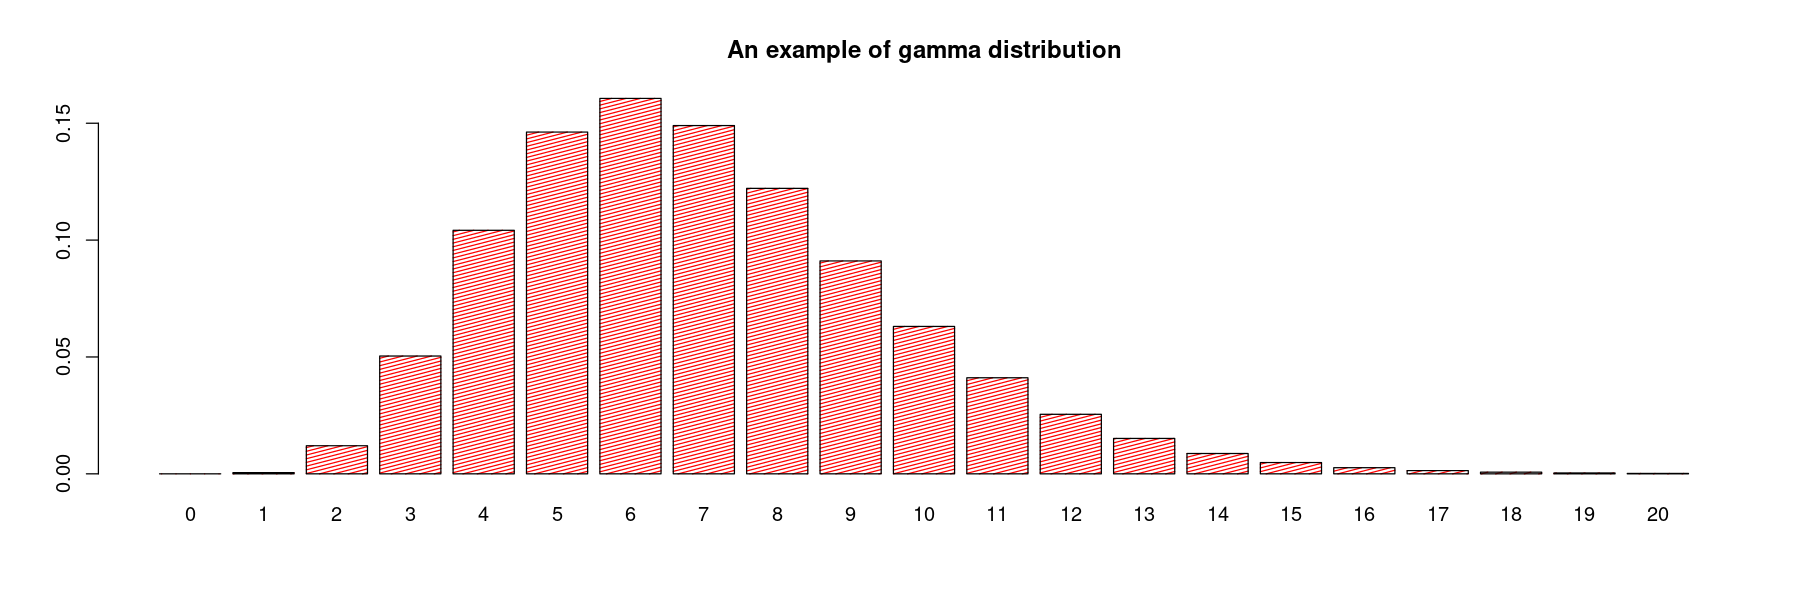

In [8]:
x <- 0:20
a <- 7
b <- 1

# An example of gamma distribution
ap <- dgamma(x,a,b)
barplot(ap, names=x, col='red', main='An example of gamma distribution', density = 30)

#### 3.1 Write an algorithm to sample variables from an Erlang distribution $Gamma(m,\beta)$

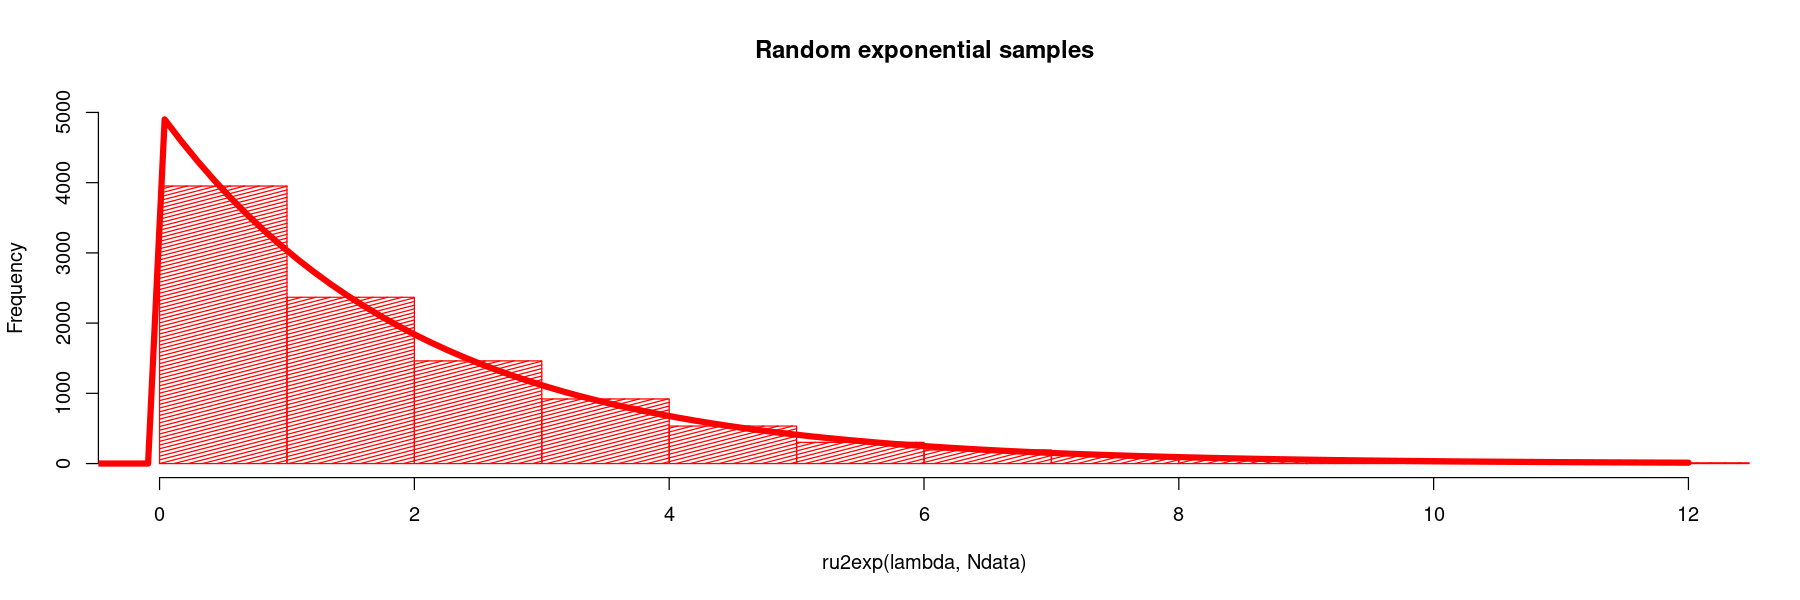

In [9]:
# We want to generate numbers that follow an erlang distribution using a sum of variables following the exponential
# one, to generate them I used the inverse sampling method (I could have used also rexp)
qu2exp <- function(lambda,p)
    {
        -log(1-p)/lambda
    }

# The function that generates N random numbers according to the exponential distribution exp(lambda), same function
# as rexp
ru2exp <- function(lambda,N)
    {
        qu2exp(lambda,runif(N))
    }

lambda <- .5
Ndata <- 10000

# Let's see if now we sample from an exponential distribution
hist(ru2exp(lambda,Ndata),col='red', density = 30, main='Random exponential samples',breaks=20,ylim=c(0,5000),xlim=c(0,12))
# we can plot the analitical curve over the distribution to check if everything so far is correct
curve(Ndata*dexp(x,lambda), from=-1, to=12, , xlab="x", ylab="y", col='red', lwd = 5, add = TRUE)

In [10]:
# Now we have to sum 'a' exponential distribution variables:
rgam <- function(N,a,b)
    {
        dist <- ru2exp(b,N)
        for (i in 2:a)
            {
                tempdist <- ru2exp(b,N)
                dist <- rowSums( cbind (dist,tempdist) )
            }
        dist
    }

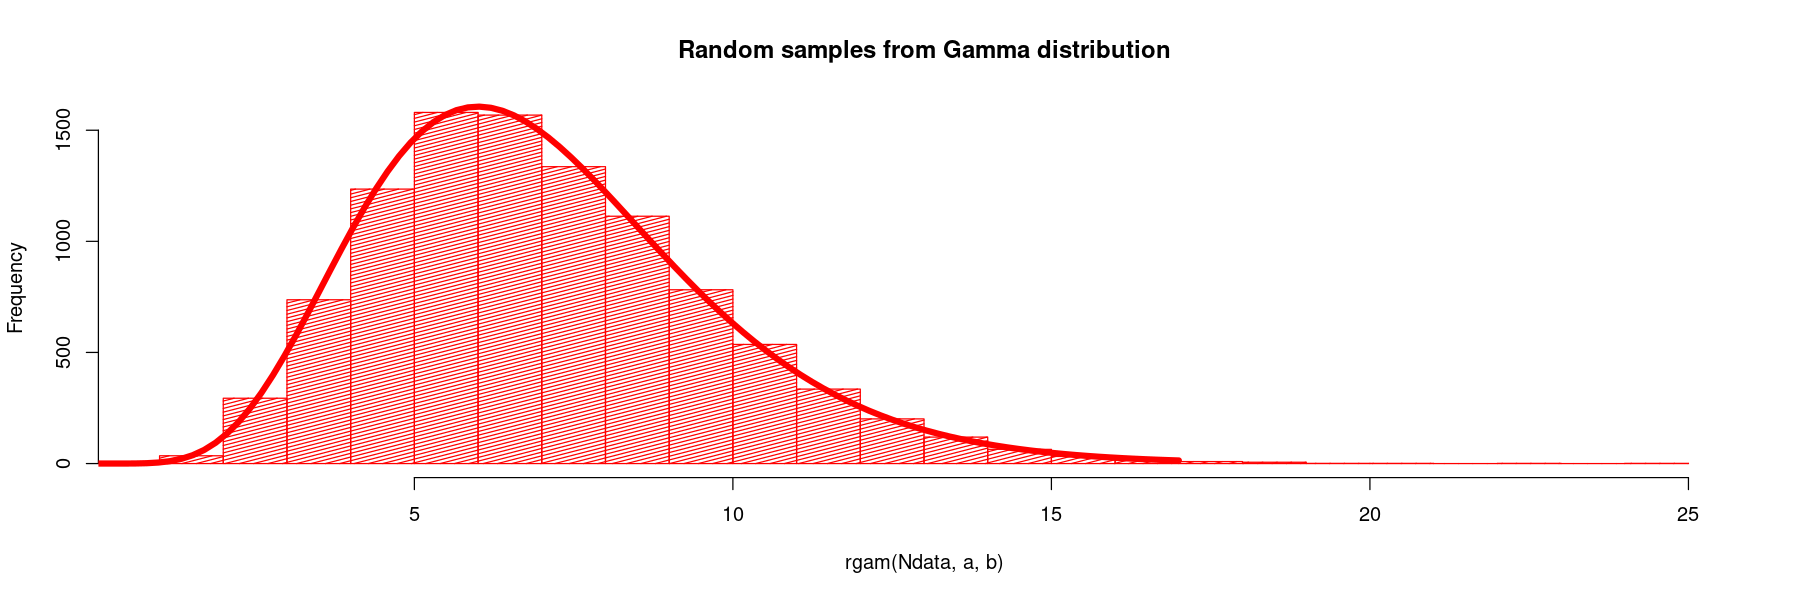

In [11]:
a <- 7
b <- 1
Ndata <- 10000

hist(rgam(Ndata,a,b),col='red', density = 30, main='Random samples from Gamma distribution',breaks=20)
curve(Ndata*dgamma(x,a,b), from=-1, to=17, , xlab="x", ylab="y", col='red', lwd = 5, add = TRUE)

### Exercise 4
#### One of the first random number generator was proposed by von Neumann, the so-called *middle square* algorithm

*from the slides:*<br>
Algorithm:<br>
1 take a number with a large number of digits, for instance 10, and square it<br>
2 extract the 10 central digits<br>
3 repeat sequence from 1

#### 4.1 Write R code to implement this type of generator and, given a fixed digit number input square it and remove the leading and trailing digits in order to return a number with the same number of digits as the original number

In [12]:
squareandtrim <- function(input_number,trim)
    {
        #print(input_number)
        strnumq <- unlist(strsplit(as.character(input_number^2),""))
        #print(strnumq)
        shift <- floor((length(strnumq) - trim)/2)
        return( as.numeric(paste(strnumq[c((shift+1):(trim+shift))], collapse="")) )
    }

In [13]:
middlesq <- function(seed, N, dim)
    {
        randvalue <- squareandtrim(seed, dim)
        result <- c(randvalue)
        for (i in 2:N)
            {
                randvalue <- squareandtrim(randvalue, dim)
                result[i] <- randvalue
            }
    
        return(result)
    }

In [14]:
randvec <- middlesq(256, 10, 2)
randvec

[1] 55  2  4 16 25 62 84  5 25 62

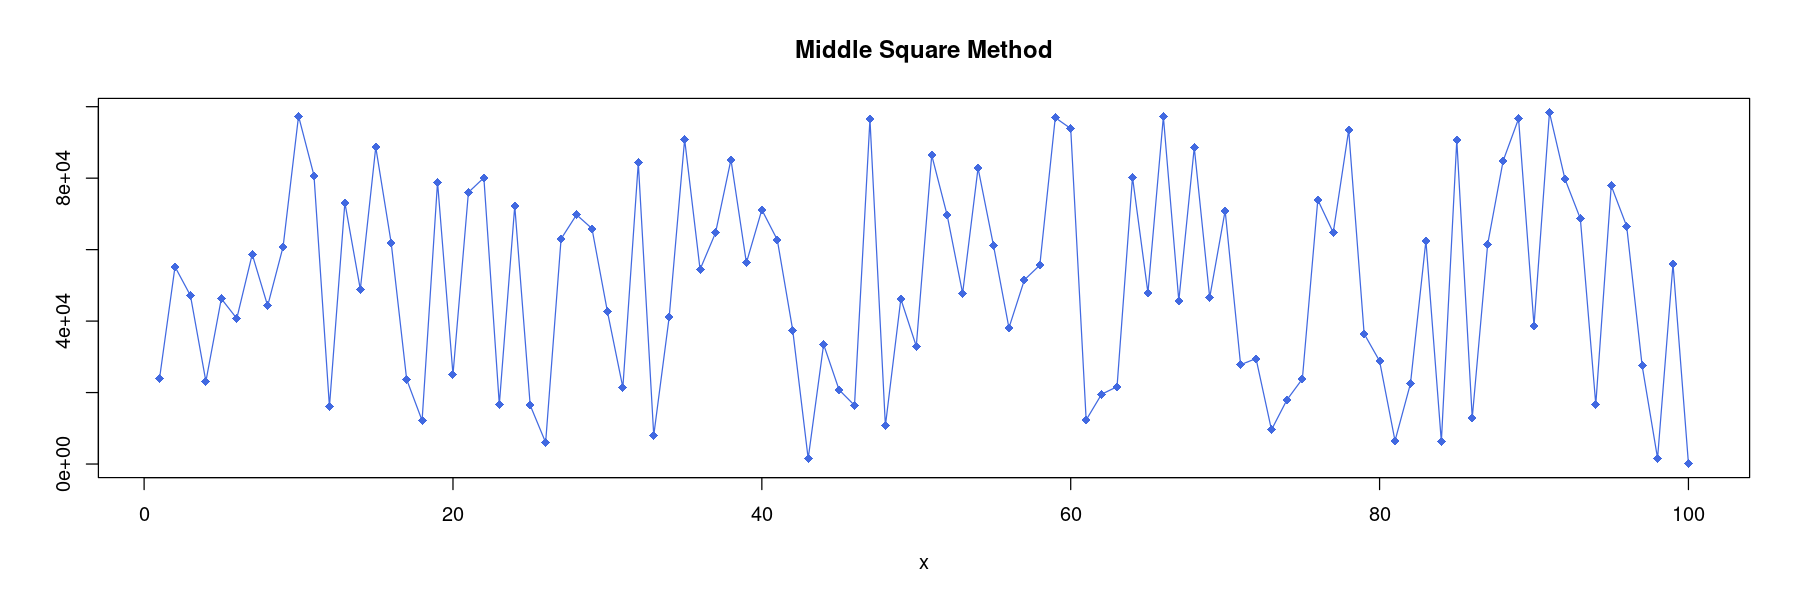

In [15]:
# Since the new value depends only on the last value and they are finite I would expect some periodicity

# For large numbers this doesn't seem to occur much
randvec <- middlesq(12345,100,5)
x <- c(1:length(randvec))
plot(x, randvec, pch=18, col='royalblue',main="Middle Square Method", ylab = '')
lines(x, randvec, col = 'royalblue')

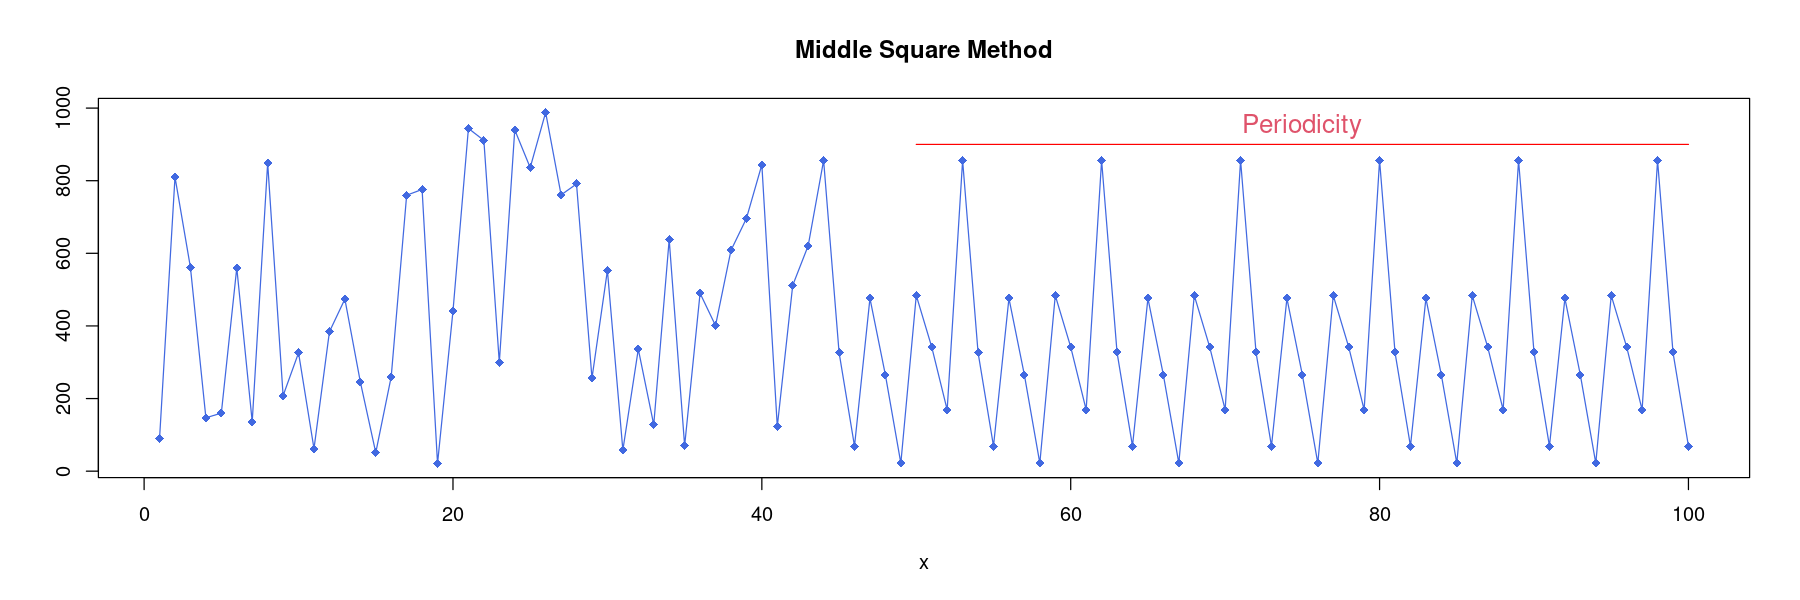

In [16]:
# However if we reduce the numbers dimension
randvec <- middlesq(6789,100,3)
x <- c(1:length(randvec))
plot(x, randvec, pch=18, col='royalblue',main="Middle Square Method", ylab = '')
lines(x, randvec, col = 'royalblue')
segments(50, 900, x1 = 100, y1 = 900,col = 'red', lty = par("lty"), lwd = par("lwd"))
text(75, 950, "Periodicity",cex = 1.3, col = 2)

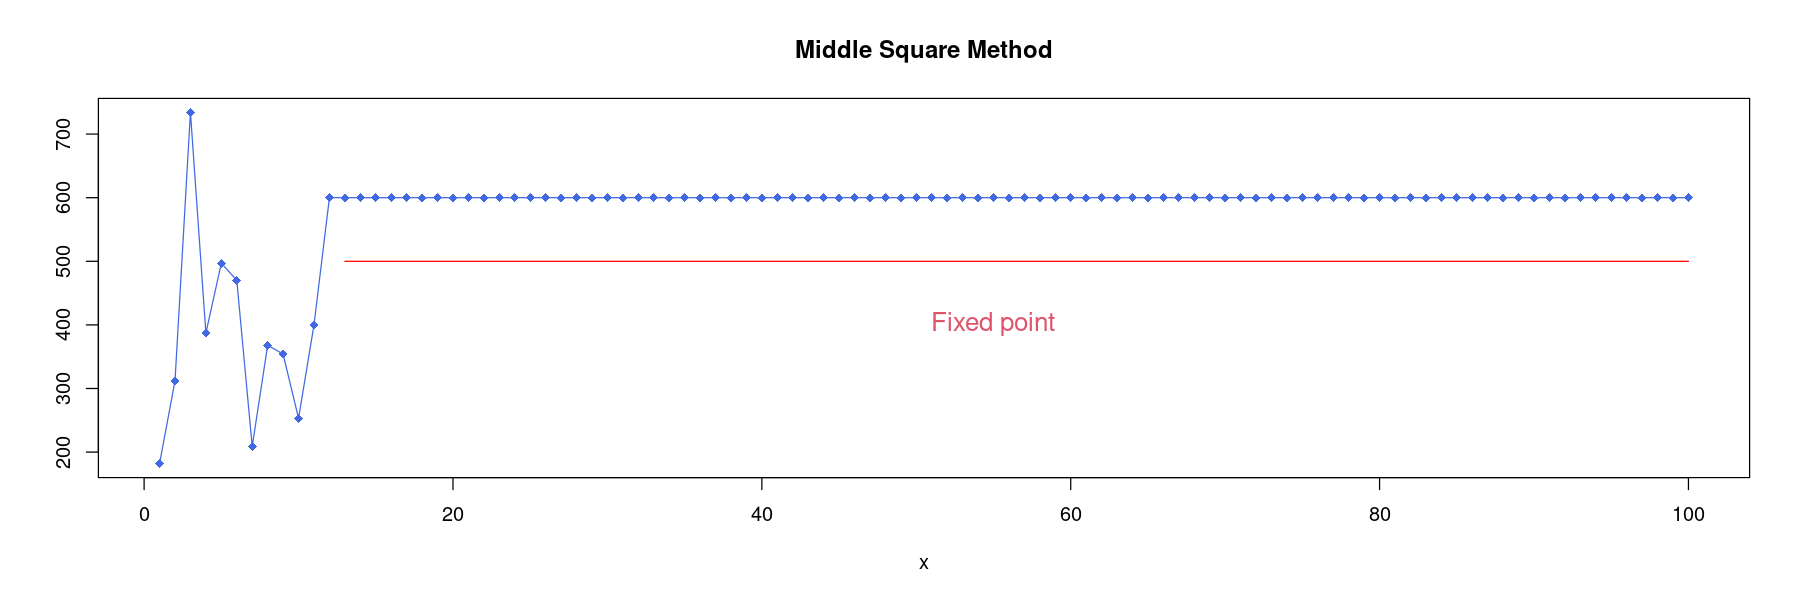

In [17]:
# With some tries we can even find the identities of this transformation
randvec <- middlesq(3344,100,3)
x <- c(1:length(randvec))
plot(x, randvec, pch=18, col='royalblue',main="Middle Square Method", ylab = '')
lines(x, randvec, col = 'royalblue')
segments(13, 500, x1 = 100, y1 = 500,col = 'red', lty = par("lty"), lwd = par("lwd"))
text(55, 400, "Fixed point",cex = 1.3, col = 2)